In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model

np.random.seed(1337)
from timeit import timeit

import matplotlib
import matplotlib.pyplot as plt

### Well-conditioned linear regression

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from PIL import Image

import random
from numpy import linalg as la
from scipy.sparse.linalg import svds, eigs
import math

p = 1000  # Ambient dimension
n = 1000  # Number of samples

# Generate a p-dimensional zero vector
x_star = np.random.randn(p)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 5, n)
S = np.diag(S)
A = U.dot(S.dot(V.T))

y = A.dot(x_star)

# Print condition number of A
print(la.cond(A))

# Compute largest singular value of A
U,S,V = la.svd(A)
L = max(S)**2
mu = min(S)**2

# eta = 1/s**2
# print(eta)

5.000000000000003


In [3]:
def GD(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_new)
    
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

In [4]:
def HB(y, A, eta, beta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_prev = x_cur
        x_cur = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_cur)
    
        # Perform gradient step
        x_new = x_cur - eta * grad + beta * (x_cur - x_prev)
    
        if (la.norm(x_new - x_cur, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_cur, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

iter# = 0, ||x_new - x_old||_2 = 0.48416832350466954
iter# = 1, ||x_new - x_old||_2 = 0.18012194843253232
iter# = 2, ||x_new - x_old||_2 = 0.10514026602695266
iter# = 3, ||x_new - x_old||_2 = 0.07154249388375683
iter# = 4, ||x_new - x_old||_2 = 0.05306667145476361
iter# = 5, ||x_new - x_old||_2 = 0.04160201476761654
iter# = 6, ||x_new - x_old||_2 = 0.03386485434137662
iter# = 7, ||x_new - x_old||_2 = 0.028312492884092256
iter# = 8, ||x_new - x_old||_2 = 0.024142086319734163
iter# = 9, ||x_new - x_old||_2 = 0.020900251401825665
iter# = 10, ||x_new - x_old||_2 = 0.01831269488151822
iter# = 11, ||x_new - x_old||_2 = 0.016203614977490458
iter# = 12, ||x_new - x_old||_2 = 0.01445488383039596
iter# = 13, ||x_new - x_old||_2 = 0.012984044616790577
iter# = 14, ||x_new - x_old||_2 = 0.011731747711989066
iter# = 15, ||x_new - x_old||_2 = 0.0106541960672848
iter# = 16, ||x_new - x_old||_2 = 0.009718394085747704
iter# = 17, ||x_new - x_old||_2 = 0.008899043916974186
iter# = 18, ||x_new - x_old||_2

iter# = 14, ||x_new - x_old||_2 = 0.021724978039721038
iter# = 15, ||x_new - x_old||_2 = 0.01711253847027125
iter# = 16, ||x_new - x_old||_2 = 0.012764032807147926
iter# = 17, ||x_new - x_old||_2 = 0.011039750489078164
iter# = 18, ||x_new - x_old||_2 = 0.008554201458991639
iter# = 19, ||x_new - x_old||_2 = 0.00688268643515073
iter# = 20, ||x_new - x_old||_2 = 0.005718249377707405
iter# = 21, ||x_new - x_old||_2 = 0.004250177430350731
iter# = 22, ||x_new - x_old||_2 = 0.003576082550612322
iter# = 23, ||x_new - x_old||_2 = 0.0029094288072703347
iter# = 24, ||x_new - x_old||_2 = 0.0021649423984594937
iter# = 25, ||x_new - x_old||_2 = 0.0018370247807916766
iter# = 26, ||x_new - x_old||_2 = 0.0014625770728294147
iter# = 27, ||x_new - x_old||_2 = 0.001142653898986915
iter# = 28, ||x_new - x_old||_2 = 0.0009487193212120846
iter# = 29, ||x_new - x_old||_2 = 0.0007105375747581441
iter# = 30, ||x_new - x_old||_2 = 0.0005830217471138462
iter# = 31, ||x_new - x_old||_2 = 0.0004954339560384083
iter

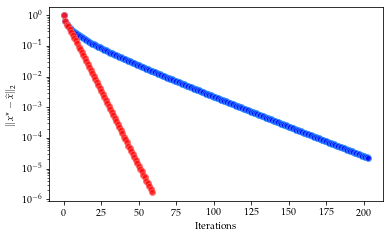

0.6400000000000005


In [6]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

# # Setting 1
# eta_GD = 2/(L + mu)
# eta_HB = 4/(np.sqrt(L) + np.sqrt(mu))**2
# beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2

# Setting 2
eta_GD = 1/L
eta_HB = 1/L
beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2

# #Setting 3
# eta_GD = 1/L
# eta_HB = 1/L
# beta = 1

# #Setting 4
# eta_GD = 0.1
# eta_HB = 0.1
# beta = 0.9

x_GD, x_list_GD, f_list_GD = GD(y, A, eta_GD, iters, epsilon, True, x_star)
x_HB, x_list_HB, f_list_HB = HB(y, A, eta_HB, beta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(len(x_list_GD))
xs_HB = range(len(x_list_HB))

plt.plot(xs_GD, x_list_GD, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.plot(xs_HB, x_list_HB, '-o', color = '#FF6666', linewidth = 4, alpha = 0.7, markerfacecolor = 'r')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

print(beta)

### Nesterov acceleration

+ Acceleration #1: 

\begin{align}
\beta = \frac{\theta_t - 1}{\theta_{t+1}}, ~~\text{where}~~ \theta_0 = 1, ~\theta_{t+1} = \frac{1 + \sqrt{1 + 4\theta_t^2}}{2}
\end{align}

In [7]:
def Nesterov1(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    y_cur = np.zeros(p)
    At = np.transpose(A)   # Transpose of A
    
    theta_cur = 1
    
    x_list, f_list = [1], [f(y, A, x_cur)]

    for i in range(iters):
        x_prev = x_cur
    
        # Compute gradient
        grad = -At @ (y - A @ y_cur)
    
        # Perform gradient step
        x_cur = y_cur - eta * grad
        
        # Perform the extrapolation step
        theta_prev = theta_cur
        theta_cur = (1 + np.sqrt(1 + 4*theta_prev**2))/2
        beta = (theta_prev - 1)/theta_cur
        
        y_cur = x_cur + beta * (x_cur - x_prev)
    
        if (la.norm(x_cur - x_prev, 2) / la.norm(x_cur, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_cur - x_star, 2))
        f_list.append(f(y, A, x_cur))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_cur - x_prev, 2)))
    
    print("Number of steps:", len(f_list))
    return x_cur, x_list, f_list

iter# = 0, ||x_new - x_old||_2 = 0.48416832350466954
iter# = 1, ||x_new - x_old||_2 = 0.18012194843253232
iter# = 2, ||x_new - x_old||_2 = 0.10514026602695266
iter# = 3, ||x_new - x_old||_2 = 0.07154249388375683
iter# = 4, ||x_new - x_old||_2 = 0.05306667145476361
iter# = 5, ||x_new - x_old||_2 = 0.04160201476761654
iter# = 6, ||x_new - x_old||_2 = 0.03386485434137662
iter# = 7, ||x_new - x_old||_2 = 0.028312492884092256
iter# = 8, ||x_new - x_old||_2 = 0.024142086319734163
iter# = 9, ||x_new - x_old||_2 = 0.020900251401825665
iter# = 10, ||x_new - x_old||_2 = 0.01831269488151822
iter# = 11, ||x_new - x_old||_2 = 0.016203614977490458
iter# = 12, ||x_new - x_old||_2 = 0.01445488383039596
iter# = 13, ||x_new - x_old||_2 = 0.012984044616790577
iter# = 14, ||x_new - x_old||_2 = 0.011731747711989066
iter# = 15, ||x_new - x_old||_2 = 0.0106541960672848
iter# = 16, ||x_new - x_old||_2 = 0.009718394085747704
iter# = 17, ||x_new - x_old||_2 = 0.008899043916974186
iter# = 18, ||x_new - x_old||_2

iter# = 22, ||x_new - x_old||_2 = 0.14996135182636658
iter# = 23, ||x_new - x_old||_2 = 0.13580315058533995
iter# = 24, ||x_new - x_old||_2 = 0.13931072404279482
iter# = 25, ||x_new - x_old||_2 = 0.1292148722934996
iter# = 26, ||x_new - x_old||_2 = 0.11534391076975001
iter# = 27, ||x_new - x_old||_2 = 0.11826888519376853
iter# = 28, ||x_new - x_old||_2 = 0.11088665426079858
iter# = 29, ||x_new - x_old||_2 = 0.09950290989899109
iter# = 30, ||x_new - x_old||_2 = 0.0993339253639245
iter# = 31, ||x_new - x_old||_2 = 0.09260161218485792
iter# = 32, ||x_new - x_old||_2 = 0.08678171501547859
iter# = 33, ||x_new - x_old||_2 = 0.08755206168730391
iter# = 34, ||x_new - x_old||_2 = 0.07848730956706458
iter# = 35, ||x_new - x_old||_2 = 0.07138712413763316
iter# = 36, ||x_new - x_old||_2 = 0.07421933662110806
iter# = 37, ||x_new - x_old||_2 = 0.0693808513980633
iter# = 38, ||x_new - x_old||_2 = 0.062216082698326174
iter# = 39, ||x_new - x_old||_2 = 0.061355073989233275
iter# = 40, ||x_new - x_old||

iter# = 35, ||x_new - x_old||_2 = 0.0013217682774324649
iter# = 36, ||x_new - x_old||_2 = 0.0011396765305005105
iter# = 37, ||x_new - x_old||_2 = 0.0010189693442613044
iter# = 38, ||x_new - x_old||_2 = 0.000964138911707287
iter# = 39, ||x_new - x_old||_2 = 0.0009623858684324209
iter# = 40, ||x_new - x_old||_2 = 0.000989417229064778
iter# = 41, ||x_new - x_old||_2 = 0.0010213941243254667
iter# = 42, ||x_new - x_old||_2 = 0.0010414844351050968
iter# = 43, ||x_new - x_old||_2 = 0.0010402692240487749
iter# = 44, ||x_new - x_old||_2 = 0.0010140356232587425
iter# = 45, ||x_new - x_old||_2 = 0.00096310057547063
iter# = 46, ||x_new - x_old||_2 = 0.0008906090557175095
iter# = 47, ||x_new - x_old||_2 = 0.0008017452534854678
iter# = 48, ||x_new - x_old||_2 = 0.0007032583510926061
iter# = 49, ||x_new - x_old||_2 = 0.0006032497145924929
iter# = 50, ||x_new - x_old||_2 = 0.0005111285675494905
iter# = 51, ||x_new - x_old||_2 = 0.00043726449819906054
iter# = 52, ||x_new - x_old||_2 = 0.000390907857693

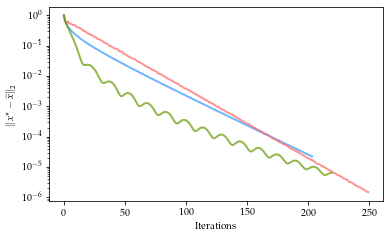

0.9


In [9]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

# # Setting 1
# eta_GD = 1/L
# eta_HB = 4/(np.sqrt(L) + np.sqrt(mu))**2
# beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2
# eta_Nest = 1/L

# # Setting 2
# eta_GD = 1/L
# eta_HB = 1/L
# eta_Nest = 1/L
# beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2

# Setting 3
eta_GD = 1/L
eta_HB = 1/L
eta_Nest = 1/L
beta = 0.9

# # Setting 4
# eta_GD = 0.1
# eta_HB = 0.1
# eta_Nest = 0.1
# beta = 0.9

x_GD, x_list_GD, f_list_GD = GD(y, A, eta_GD, iters, epsilon, True, x_star)
x_HB, x_list_HB, f_list_HB = HB(y, A, eta_HB, beta, iters, epsilon, True, x_star)
x_Nest1, x_list_Nest1, f_list_Nest1 = Nesterov1(y, A, eta_Nest, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(len(x_list_GD))
xs_HB = range(len(x_list_HB))
xs_Nest1 = range(len(x_list_Nest1))

plt.plot(xs_GD, x_list_GD, '-', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_HB, x_list_HB, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest1, x_list_Nest1, '-', color = '#669900', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

print(beta)

#### Some observations

+ The curve has ripples: Actually, Nesterov's method is not a descent method (i.e., it does not guarantee that *per iteration* the distance to the optimum (and the function values) should drop)
+ Nesterov's method is hyper-parameter free: you don't have to worry about how to set up the momentum parameter.
+ It actually works (even in theory) beyond strongly convex functions: we presented a theorem for the Heavy Ball method that shows acceleration, but assumes strong convexity (as well as knowing many parameters such as Lipschitz gradient continuity, strong convexity). Nesterov's method requires only the knowledge of the Lipschitz gradient continuity (which is the easiest to learn - why?)

In [ ]:
def Nesterov2(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    y_cur = np.zeros(p)
    At = np.transpose(A)   # Transpose of A
    
    x_list, f_list = [1], [f(y, A, x_cur)]

    for i in range(iters):
        x_prev = x_cur
    
        # Compute gradient
        grad = -At @ (y - A @ y_cur)
    
        # Perform gradient step
        x_cur = y_cur - eta * grad
        
        # Perform the extrapolation step
        beta = i / (i + 3)
        
        y_cur = x_cur + beta * (x_cur - x_prev)
    
        if (la.norm(x_cur - x_prev, 2) / la.norm(x_cur, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_cur - x_star, 2))
        f_list.append(f(y, A, x_cur))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_cur - x_prev, 2)))
    
    print("Number of steps:", len(f_list))
    return x_cur, x_list, f_list

In [ ]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

# Setting 1
eta_GD = 2/(L + mu)
eta_HB = 4/(np.sqrt(L) + np.sqrt(mu))**2
beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2
eta_Nest = 1/L

# Setting 2
eta_GD = 1/L
eta_HB = 1/L
eta_Nest = 1/L
beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2

# # Setting 3
# eta_GD = 1/L
# eta_HB = 1/L
# eta_Nest = 1/L
# beta = 0.9

# # Setting 4
# eta_GD = 0.1
# eta_HB = 0.1
# eta_Nest = 0.1
# beta = 0.9

x_GD, x_list_GD, f_list_GD = GD(y, A, eta_GD, iters, epsilon, True, x_star)
x_HB, x_list_HB, f_list_HB = HB(y, A, eta_HB, beta, iters, epsilon, True, x_star)
eta_GD = 1/L
x_Nest1, x_list_Nest1, f_list_Nest1 = Nesterov1(y, A, eta_Nest, iters, epsilon, True, x_star)
x_Nest2, x_list_Nest2, f_list_Nest2 = Nesterov2(y, A, eta_Nest, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(len(x_list_GD))
xs_HB = range(len(x_list_HB))
xs_Nest1 = range(len(x_list_Nest1))
xs_Nest2 = range(len(x_list_Nest2))

plt.plot(xs_GD, x_list_GD, '-', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_HB, x_list_HB, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest1, x_list_Nest1, '-', color = '#669900', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest2, x_list_Nest2, '-', color = '#660099', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

print(beta)

In [ ]:
def Nesterov3(y, A, eta, L, mu, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    y_cur = np.zeros(p)
    At = np.transpose(A)   # Transpose of A
    
    beta = (np.sqrt(L) - np.sqrt(mu))/(np.sqrt(L) + np.sqrt(mu))
    
    x_list, f_list = [1], [f(y, A, x_cur)]

    for i in range(iters):
        x_prev = x_cur
    
        # Compute gradient
        grad = -At @ (y - A @ y_cur)
    
        # Perform gradient step
        x_cur = y_cur - eta * grad
        
        # Perform the extrapolation step
        y_cur = x_cur + beta * (x_cur - x_prev)
    
        if (la.norm(x_cur - x_prev, 2) / la.norm(x_cur, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_cur - x_star, 2))
        f_list.append(f(y, A, x_cur))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_cur - x_prev, 2)))
    
    print("Number of steps:", len(f_list))
    return x_cur, x_list, f_list

In [ ]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

# Setting 1
eta_GD = 2/(L + mu)
eta_HB = 4/(np.sqrt(L) + np.sqrt(mu))**2
beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2
eta_Nest = 2/(L + mu)

# # Setting 2
# eta_GD = 1/L
# eta_HB = 1/L
# eta_Nest = 1/L
# beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2

# # Setting 3
# eta_GD = 1/L
# eta_HB = 1/L
# eta_Nest = 1/L
# beta = 0.9

# # Setting 4
# eta_GD = 0.1
# eta_HB = 0.1
# eta_Nest = 0.1
# beta = 0.9

x_GD, x_list_GD, f_list_GD = GD(y, A, eta_GD, iters, epsilon, True, x_star)
x_HB, x_list_HB, f_list_HB = HB(y, A, eta_HB, beta, iters, epsilon, True, x_star)
eta_GD = 1/L
x_Nest1, x_list_Nest1, f_list_Nest1 = Nesterov1(y, A, eta_Nest, iters, epsilon, True, x_star)
x_Nest2, x_list_Nest2, f_list_Nest2 = Nesterov2(y, A, eta_Nest, iters, epsilon, True, x_star)
x_Nest3, x_list_Nest3, f_list_Nest3 = Nesterov3(y, A, eta_Nest, L, mu, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(len(x_list_GD))
xs_HB = range(len(x_list_HB))
xs_Nest1 = range(len(x_list_Nest1))
xs_Nest2 = range(len(x_list_Nest2))
xs_Nest3 = range(len(x_list_Nest3))

plt.plot(xs_GD, x_list_GD, '-', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_HB, x_list_HB, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest1, x_list_Nest1, '-', color = '#669900', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest2, x_list_Nest2, '-', color = '#660099', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest3, x_list_Nest3, '-', color = '#666600', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

print(beta)

### Noise tolerance in acceleration

Let us first describe a very simple case (actually we have already described a very similar case above) on top of which we will build some intuition for the result we discussed just now.
Consider the minimization of a smooth convex function 
$f\colon \mathbb{R}^n\rightarrow\mathbb{R}$ defined as:

$$
\displaystyle f(x) = \frac{1}{2} x^\top A x - b^\top x.
$$
Here, $A$ is a positive semidefinite matrix with $n \times n$ dimensions, and $b \in \mathbb{R}^n$, both given.
One can easy compute that:
$$
\nabla f(x) = Ax - b
$$

For the purpose of this example, we will consider the case of a Laplacian cycle graph:
$$
A = \begin{bmatrix} 2 & -1 & 0 & 0 & 0 & \cdots & -1 \\ 
                   -1 & 2 & -1 & 0 & 0 & \cdots & 0 \\ 
                   0 & -1 & 2 & -1 & 0 & \cdots & 0 \\ 
                   \vdots & & & \ddots & & \vdots & \vdots
    \end{bmatrix}
$$

By definition, since $A$ is PSD, the problem is convex. 
Moreover, by definition of $A$ it is not hard to see that the function satisfies Lipschitz gradient continuity with constaint $L = 4$.

Let us do the following experiment then:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def GD(init, grad, L = 1, iters = 100):
    x_cur = init
    x_list = [init]
    for t in range(0, iters):
        x_cur = x_cur - (1/L)*grad(x_cur)
        x_list.append(x_cur)
    return x_list

def AccGD(init, grad, L = 1, iters = 100):
    x_cur = init
    y_cur = init
    x_list = [init]
    theta = 1
    for t in range(0, iters):
        theta = 0.5 * (1.0 + np.sqrt(1+4.0*theta**2))
        theta2 = 0.5 * (1.0 + np.sqrt(1+4.0*theta**2))
        beta = (theta - 1)/theta2
        y2 = x_cur - (1/L) * grad(x_cur)
        x_cur = y2 + beta * (y2 - y_cur)
        y_cur = y2
        x_list.append(x_cur)
    return x_list

In [ ]:
n = 100
B = np.zeros((n,n))
for i in range(1,n-1):
    B[i,i+1] = 1
    B[i,i-1] = 1
B[0,1] = 1
B[n-1,n-2] = 1
A = 2.0*np.eye(n) - B
b = np.zeros(n)
b[0] = 1
opt = np.dot(np.linalg.pinv(A),b)

def f(x):
    return 0.5*np.dot(x, np.dot(A,x)) - np.dot(x,b)
                                
def grad(x):
    return np.dot(A,x) - b

f_star = f(opt)

iters = 5000

xs3 = GD(np.zeros(n), grad, 4, iters)
ys3 = [ abs(f(xs3[i])-f_star) for i in range(0, iters) ]
xs3acc = AccGD(np.zeros(n), grad, 4, iters)
ys3acc = [ abs(f(xs3acc[i])-f_star) for i in range(0, iters) ]

plt.yscale('log')
plt.plot(range(0,iters), ys3, range(0,iters), ys3acc)

In [ ]:
def noisygrad(x):
    return np.dot(A,x) - b + np.random.normal(0,1,(n))

iters = 500

xs3 = GD(np.zeros(n), noisygrad, 4, iters)
ys3 = [ abs(f(xs3[i])-f_star) for i in range(0, iters) ]
xs3acc = AccGD(np.zeros(n), noisygrad, 4, iters)
ys3acc = [ abs(f(xs3acc[i])-f_star) for i in range(0, iters) ]

plt.yscale('linear')
plt.plot(range(0, iters), ys3, range(0, iters), ys3acc)